# Problema 3

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#para la regresion y el analisis de esta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Lets import data

In [2]:
data_set = pd.read_csv('problem3.csv',sep=',',header='infer')
df = data_set.copy()

In [3]:
len(df)

5

In [4]:
df

,Id,0,1,2,3,4,5,6,7,8,9,10,11,12
0,﻿x_age,35,18,22,23,28,38,40,25,35,34,25,20,1
1,x_cholesterol,220,240,260,220,180,280,235,200,150,280,275,150,2
2,x_sugar,80,120,55,75,100,74,175,180,240,130,150,125,3
3,x_Tcell,550,600,580,575,620,674,275,180,140,80,250,325,4
4,y,0,0,0,0,0,0,1,1,1,1,1,1,5


In [5]:
df_trans = df.T
df_trans.iloc[0]

0           ﻿x_age
1    x_cholesterol
2          x_sugar
3          x_Tcell
4                y
Name: Id, dtype: object

In [6]:
df_trans.columns = df_trans.iloc[0]
df_trans = df_trans.drop(df_trans.index[0])
df_trans = df_trans.drop(df_trans.index[len(df_trans)-1])
#df = df.iloc[pd.RangeIndex(len(df)).drop(4)]

In [7]:
df_trans

Id,﻿x_age,x_cholesterol,x_sugar,x_Tcell,y
0,35,220,80,550,0
1,18,240,120,600,0
2,22,260,55,580,0
3,23,220,75,575,0
4,28,180,100,620,0
5,38,280,74,674,0
6,40,235,175,275,1
7,25,200,180,180,1
8,35,150,240,140,1
9,34,280,130,80,1


In [8]:
df_trans.shape

(12, 5)

we plot in order to see how the features are correlated to the progress in HVI

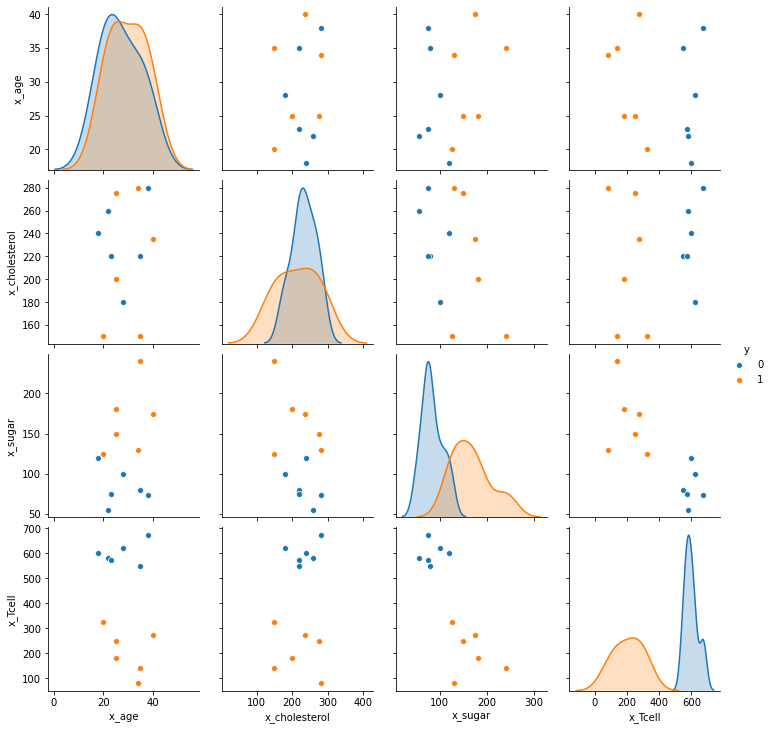

In [9]:
import seaborn as sns
sns.pairplot(df_trans, hue='y', markers='o')
plt.show()

In [10]:
X = df_trans.drop('y', axis=1)
target = np.array(df_trans.loc[:,'y']).reshape(-1,1)
target = target.astype('int')

make the generalization

In [35]:
seed = int(50)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target,
                                                    test_size=0.3, random_state= seed)

In [36]:
x_train

Id,﻿x_age,x_cholesterol,x_sugar,x_Tcell
2,22,260,55,580
7,25,200,180,180
5,38,280,74,674
6,40,235,175,275
4,28,180,100,620
1,18,240,120,600
11,20,150,125,325
0,35,220,80,550


Prepare our classification model

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [14]:
model = LinearDiscriminantAnalysis()
#model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
print('Accuracy of classifier on training set: {:.2f}'.format(model.score(x_train,
                                                                           y_train)))
print('Accuracy of classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of classifier on training set: 1.00
Accuracy of classifier on test set: 1.00


/Users/Octavalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


the data generalizes well, so we a little more deep in the analysis of two features.
### Sugar vs. Tcell

In [15]:
X1 = x_train[['x_sugar','x_Tcell']]
Y1 = y_train


In [16]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
h = .02
# calculate min, max and limits
x_min, x_max = X1['x_sugar'].min() - 1, X1['x_sugar'].max() + 1
y_min, y_max = X1['x_Tcell'].min() - 1, X1['x_Tcell'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [17]:
from sklearn.metrics import accuracy_score
model.fit(X1,Y1)
X_test = x_test[['x_sugar','x_Tcell']]
Y_test = y_test
predictions=model.predict(X_test)
print(accuracy_score(Y_test,predictions))

1.0


/Users/Octavalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


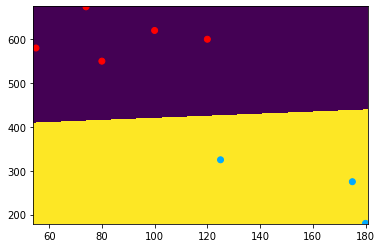

In [18]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)
plt.scatter(X1['x_sugar'], X1['x_Tcell'], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [19]:
sugar = X['x_sugar'].to_numpy()
sugar = sugar.reshape(-1,1)

colesterol = X['x_Tcell'].to_numpy()
colesterol = colesterol.reshape(-1,1)


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(colesterol , target, test_size=0.3, random_state= seed)

In [21]:
#model = LogisticRegression(solver='liblinear', multi_class='ovr')
model = LogisticRegression(solver='newton-cg', multi_class='ovr')
#model = LogisticRegression(solver='saga')#, multi_class='ovr')
#lbfgs stand for: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm". It is one of the solvers' algorithms provided by Scikit-Learn Library.

In [22]:
model.fit(x_train, y_train)
model.score(x_train, y_train) 

/Users/Octavalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1.0

Text(0, 0.5, 'prediction')

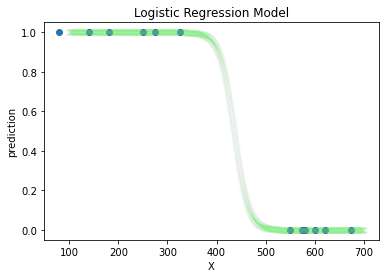

In [28]:
W = np.arange(100, 700, 0.1)
W = W.reshape(-1, 1)
plt.scatter(colesterol , target)
plt.scatter(W, model.predict_proba(W)[:,1],marker='x',color='lightgreen',linewidth=.008)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('prediction')

### Age vs Cholesterol

In [44]:
 x_train

Id,﻿x_age,x_cholesterol,x_sugar,x_Tcell
2,22,260,55,580
7,25,200,180,180
5,38,280,74,674
6,40,235,175,275
4,28,180,100,620
1,18,240,120,600
11,20,150,125,325
0,35,220,80,550


In [61]:
age = x_train.iloc[:,0]
X1_casi = x_train['x_cholesterol']
Y1 = y_train
X1 = pd.DataFrame({'x_age' : age, 'x_cholesterol' : X1_casi})


In [62]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
h = .02
# calculate min, max and limits
x_min, x_max = X1['x_age'].min() - 1, X1['x_age'].max() + 1
y_min, y_max = X1['x_cholesterol'].min() - 1, X1['x_cholesterol'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [63]:
from sklearn.metrics import accuracy_score
model.fit(X1,Y1)
X_test = x_test[['x_sugar','x_Tcell']]
Y_test = y_test
predictions=model.predict(X_test)
print(accuracy_score(Y_test,predictions))

1.0


/Users/Octavalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


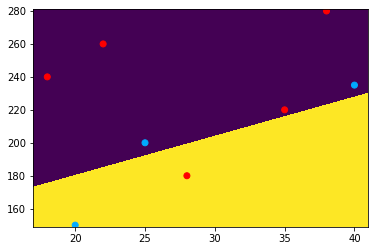

In [65]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)
plt.scatter(X1['x_age'], X1['x_cholesterol'], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [68]:
age = X.iloc[:,0].to_numpy()
age = age.reshape(-1,1)

colesterol = X['x_cholesterol'].to_numpy()
colesterol = colesterol.reshape(-1,1)

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(age , target, test_size=0.3, random_state= seed)

In [70]:
model.fit(x_train, y_train)
model.score(x_train, y_train) 

/Users/Octavalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.625

Text(0, 0.5, 'prediction')

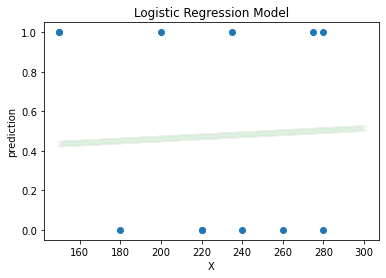

In [73]:
W = np.arange(150, 300, 0.1)
W = W.reshape(-1, 1)
plt.scatter(colesterol , target)
plt.scatter(W, model.predict_proba(W)[:,1],marker='x',color='lightgreen',linewidth=.008)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('prediction')

Red Neuronal

In [74]:
n_cols=X.shape[1]
print(n_cols)

4


In [75]:
def classification_model():
    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['binary_accuracy'])
    #model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
    return model

In [76]:
classifier = KerasClassifier(build_fn = classification_model, epochs=200,
                             batch_size=20, verbose=2)

In [77]:
kfold = KFold(n_splits=2, shuffle=True, random_state=seed)
results = cross_val_score(classifier, x_test , 
                          y_test, cv = kfold)


print("Rendimiento del modelo: Media: %.3f%% std: (%.2f%%)" % (results.mean()*100,
                                                               results.std()*100))

Rendimiento del modelo: Media: nan% std: (nan%)


/Users/Octavalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Octavalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Octavalo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/Octavalo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/Octavalo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1050, in fit
    data_handler = data_adapter.DataHandler(